# Obesity Levels Data Analysis

This project analyzes a dataset on obesity levels, exploring the relationships between lifestyle choices, physical activity, and demographic factors. The aim is to conduct thorough data cleaning and preprocessing, followed by exploratory data analysis (EDA), to extract meaningful insights that can inform public health strategies.

## Objectives:
1. Understand how lifestyle and activity levels influence obesity.
2. Investigate correlations with various demographic factors.
3. Provide actionable insights based on data findings.

## Key Steps:
1. **Data Cleaning and Preprocessing**: Preparing the dataset by handling missing values, removing outliers, and transforming categorical variables.
2. **Exploratory Data Analysis (EDA)**: Analyzing the data through descriptive statistics, visualizations, and correlation analysis to uncover patterns.
3. **Visualization**: Creating graphs and charts to visualize trends and relationships between key factors.
4. **Drawing Conclusions**: Summarizing key findings to inform public health strategies aimed at combating obesity.

This project is aimed at driving actionable insights for better public health outcomes based on data-driven analysis.



## Step 1: Load Dataset

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
# Load data
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
print("Dataset loaded successfully.")


Dataset loaded successfully.


### Explanation
- **Objective**: Load the dataset into a Pandas DataFrame for analysis.
- **Output**: Successful loading message.


## Step 2: Initial Data Inspection

In [4]:
print("Initial Data Information:")
print(data.info())


Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF     

In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00000

### Explanation
- **Objective**: Understand the dataset's structure (columns, datatypes, missing values).
- **Output**: Basic data summary including count, mean, and datatypes.


## Data Cleaning and Preprocessing
#### Objective
Data cleaning ensures that the dataset is accurate, complete, and ready for analysis. For this project, we focus on handling missing values, removing duplicates, and preparing data for machine learning.


## Step 3: Data Cleaning
### 3.1 Check for Missing Values

In [6]:
print("\nChecking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)
if missing_values.any():
    data = data.dropna()  # Drop rows with missing values
    print("Missing values handled by dropping rows.")


Checking for missing values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


### 3.2 Check for Duplicates


In [7]:
print("\nChecking for duplicate rows:")
print(data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicate rows removed.")


Checking for duplicate rows:
24
Duplicate rows removed.


### Explanation
- **Objective**: Ensure dataset integrity by handling missing values and duplicates.
- **Output**: Cleaned dataset with no missing values or duplicates.



## Step 4: Data Preprocessing
### 4.1 Encode Categorical Variables

In [8]:
categorical_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "CALC", "SMOKE", "SCC", "NObeyesdad"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
print("Categorical variables encoded.")

Categorical variables encoded.


### 4.2 Standardize Numerical Variables


In [9]:
numerical_columns = ["Age", "Height", "Weight"]
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Numerical variables standardized.")

Numerical variables standardized.


### 4.3 Apply One-Hot Encoding


In [10]:
data = pd.get_dummies(data, columns=["MTRANS", "CAEC", "CALC"], drop_first=True)
print("One-hot encoding applied to selected variables.")

One-hot encoding applied to selected variables.


### 4.4 Age Binning


In [11]:
bins = [0, 18, 30, 45, 60, 100]
labels = ["0-18", "19-30", "31-45", "46-60", "60+"]
data['Age_Bin'] = pd.cut(data['Age'], bins=bins, labels=labels)
print("Age binning completed.")

Age binning completed.


### Explanation
- **Objective**: Prepare data for modeling by encoding, standardizing, and transforming variables.
- **Output**: A fully preprocessed dataset.


## Step 5: Exploratory Data Analysis (EDA)
### 5.1 Correlation Heatmap

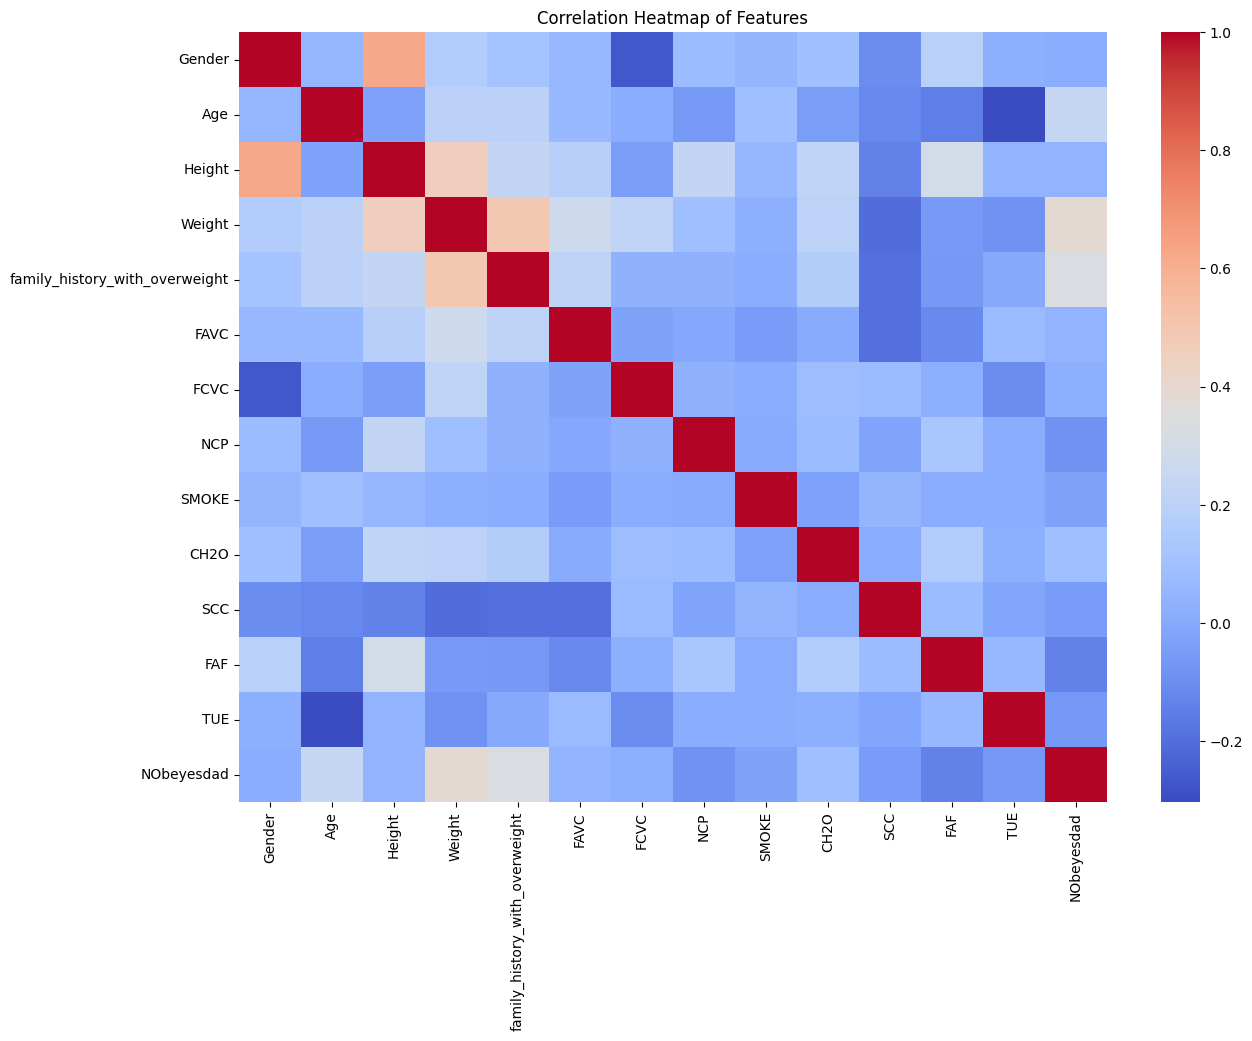

In [12]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Now calculate the correlation matrix only on numeric columns
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


### 5.2 Distribution of Obesity Levels

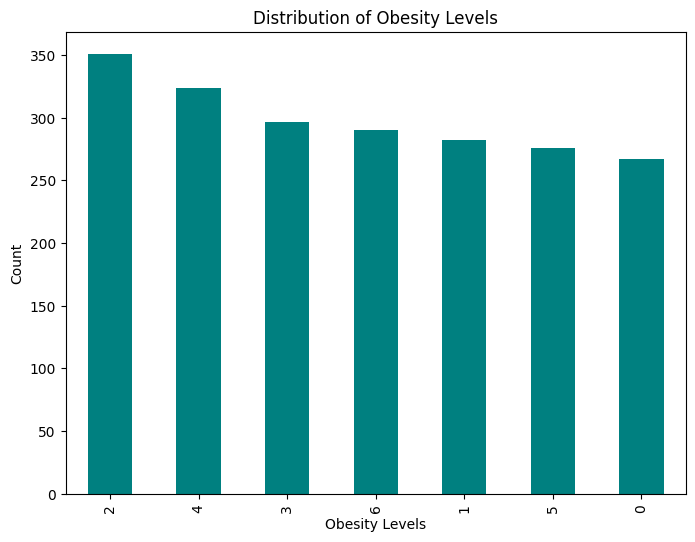

In [13]:
plt.figure(figsize=(8, 6))
data['NObeyesdad'].value_counts().plot(kind='bar', color='teal')
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.show()

### 5.3 Gender vs. Obesity Levels

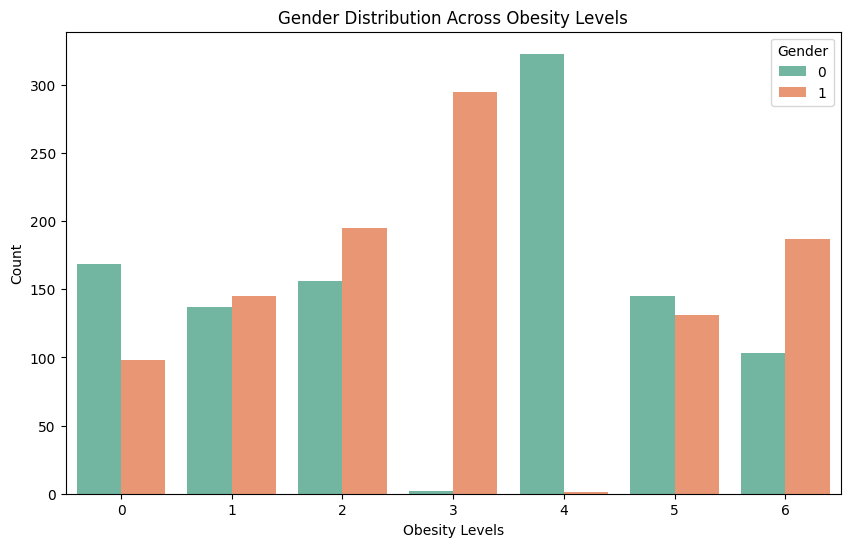

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="NObeyesdad", hue="Gender", palette="Set2")
plt.title("Gender Distribution Across Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.show()

### 5.4 Age Group Analysis


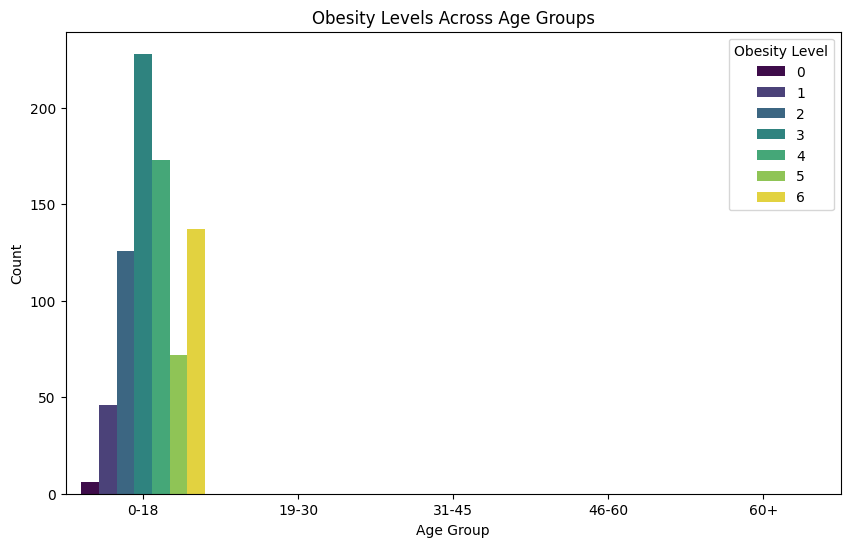

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Age_Bin", hue="NObeyesdad", palette="viridis")
plt.title("Obesity Levels Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Obesity Level", loc="upper right")
plt.show()

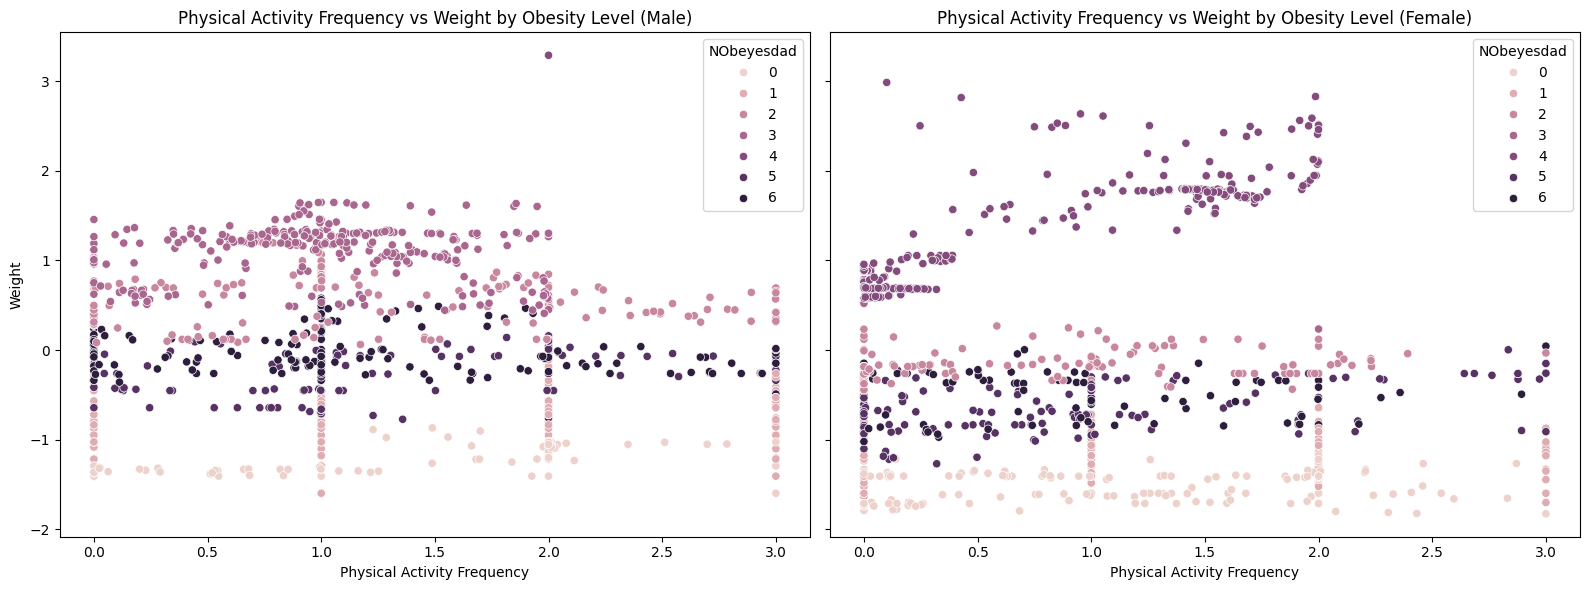

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each gender
data_male = data[data['Gender'] == 1]  # Assuming 1 represents Male
data_female = data[data['Gender'] == 0]  # Assuming 0 represents Female

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Male - Scatter plot
sns.scatterplot(ax=axes[0], x='FAF', y='Weight', hue='NObeyesdad', data=data_male)
axes[0].set_title('Physical Activity Frequency vs Weight by Obesity Level (Male)')
axes[0].set_xlabel('Physical Activity Frequency')
axes[0].set_ylabel('Weight')

# Female - Scatter plot
sns.scatterplot(ax=axes[1], x='FAF', y='Weight', hue='NObeyesdad', data=data_female)
axes[1].set_title('Physical Activity Frequency vs Weight by Obesity Level (Female)')
axes[1].set_xlabel('Physical Activity Frequency')

plt.tight_layout()
plt.show()


### Explanation
- **Objective**: Visualize patterns and relationships in the dataset.
- **Output**: Detailed plots illustrating trends.



## Step 6: Advanced Visualizations
### 6.1 Activity Frequency vs Weight

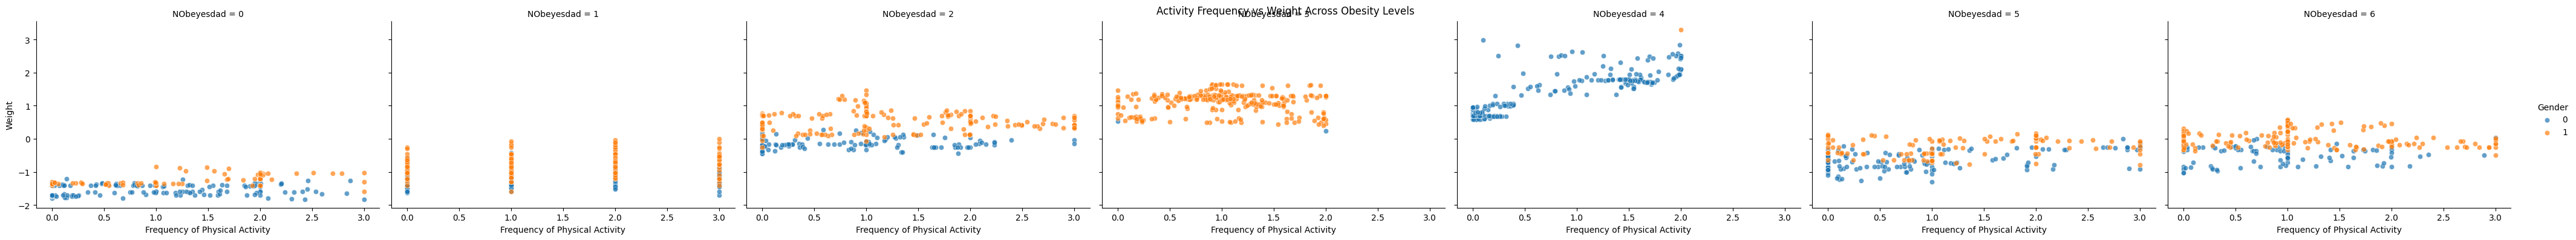

In [17]:
g = sns.FacetGrid(data, col="NObeyesdad", hue="Gender", height=4, aspect=1.5)
g.map(sns.scatterplot, "FAF", "Weight", alpha=0.7)
g.add_legend()
g.set_axis_labels("Frequency of Physical Activity", "Weight")
g.fig.suptitle("Activity Frequency vs Weight Across Obesity Levels")
plt.show()

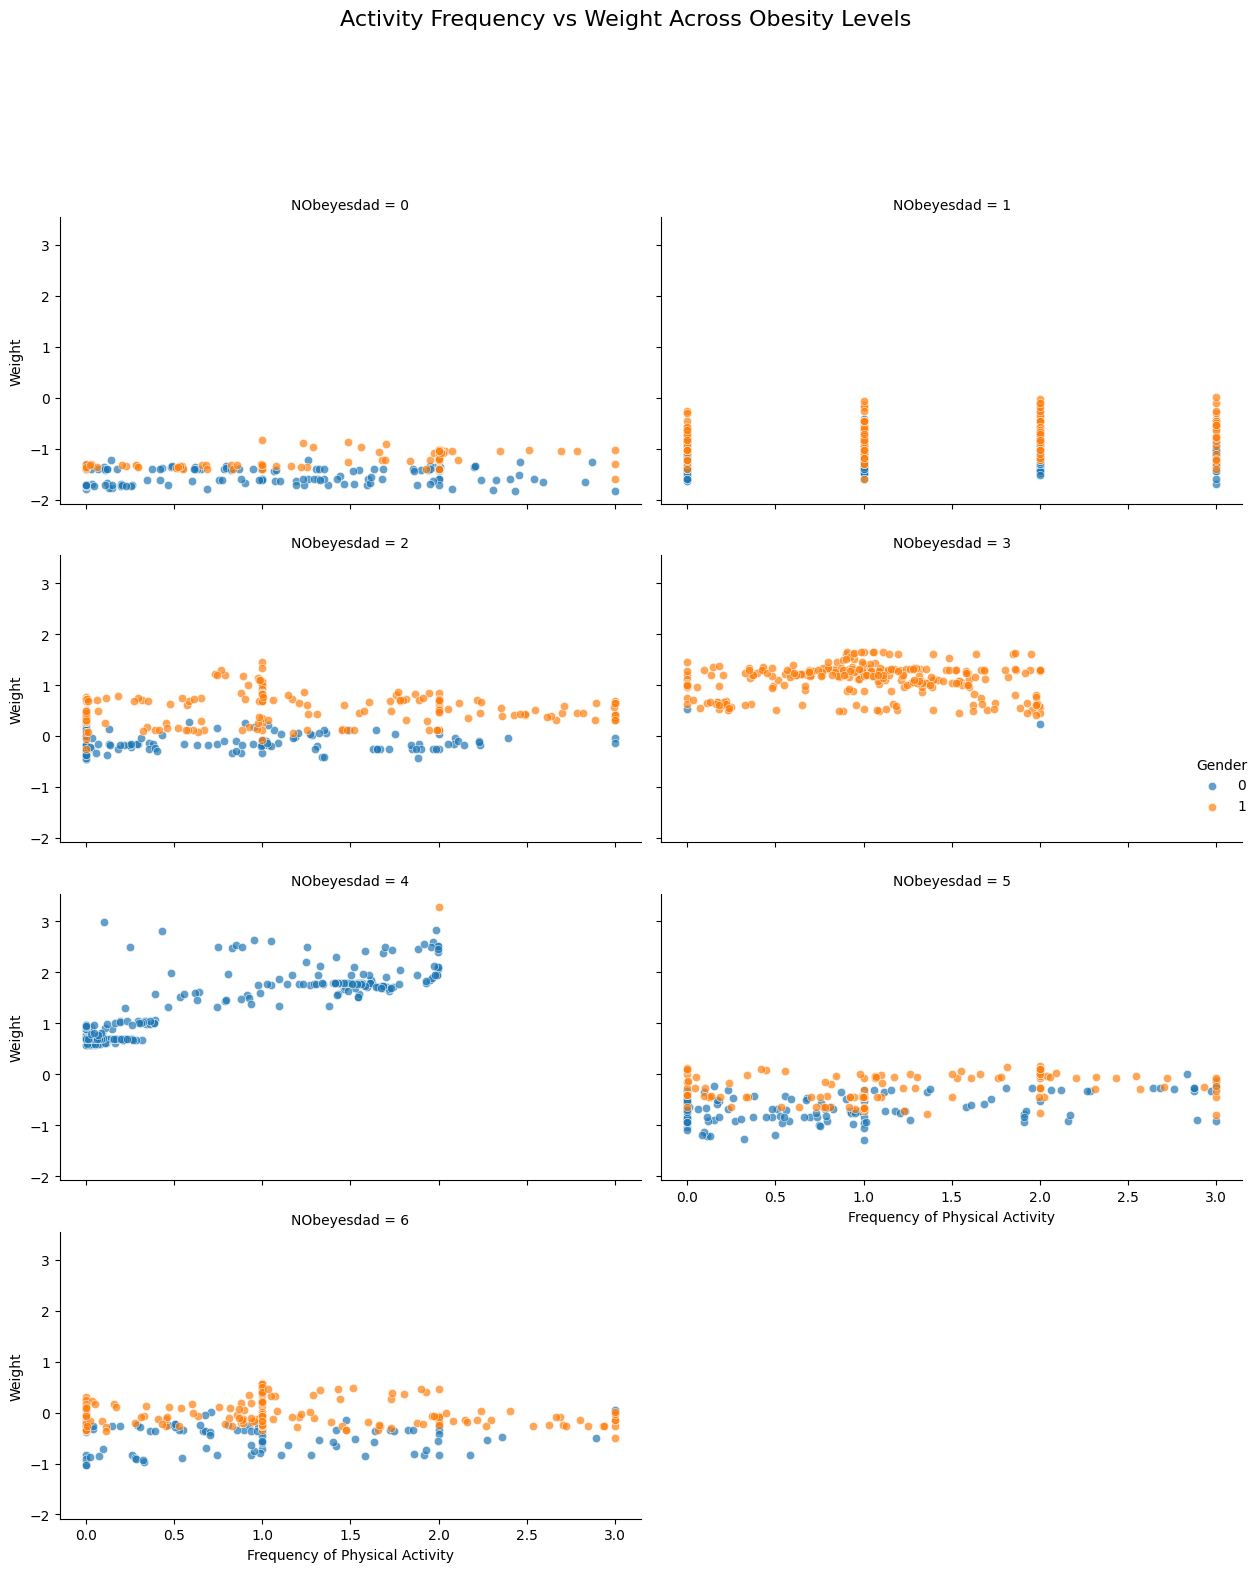

In [18]:

g = sns.FacetGrid(data, col="NObeyesdad", hue="Gender", height=4, aspect=1.5, col_wrap=2)
g.map(sns.scatterplot, "FAF", "Weight", alpha=0.7)
g.add_legend()
g.set_axis_labels("Frequency of Physical Activity", "Weight")
g.fig.suptitle("Activity Frequency vs Weight Across Obesity Levels", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)

# Show the plot
plt.show()


### 6.2 Lifestyle Correlations

In [19]:
print(data.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'NObeyesdad', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC_1', 'CAEC_2',
       'CAEC_3', 'CALC_1', 'CALC_2', 'CALC_3', 'Age_Bin'],
      dtype='object')


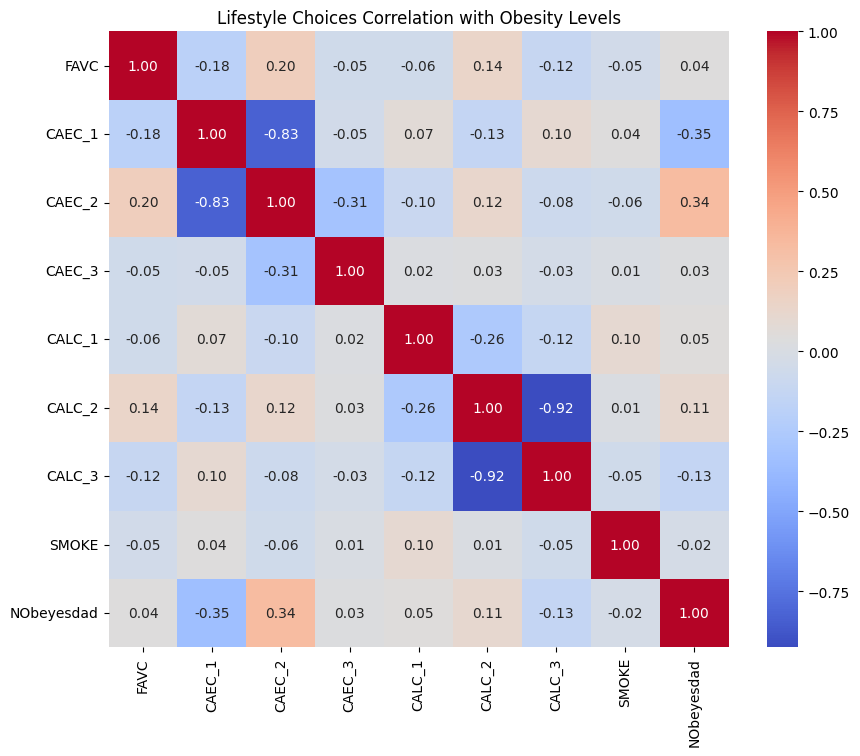

In [20]:
lifestyle_columns = ["FAVC", "CAEC_1", "CAEC_2", "CAEC_3", "CALC_1", "CALC_2", "CALC_3", "SMOKE"]
lifestyle_corr = data[lifestyle_columns + ["NObeyesdad"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(lifestyle_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lifestyle Choices Correlation with Obesity Levels")
plt.show()



### Explanation
- **Objective**: Explore deeper relationships through advanced visualizations.
- **Output**: Insights into the impact of lifestyle choices.

# Model Training and Evaluation

## 7. Train-Test Split
Split the dataset into training and testing sets for evaluation.


In [21]:
data_encoded = data

In [22]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data_encoded.drop('NObeyesdad', axis=1)  # Features
y = data_encoded['NObeyesdad']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1669, 24)
Testing set size: (418, 24)


#Step 8: Model Training and Evaluation:
####  Linear Regression, Logistic Regression, and Random Forest


In [23]:
print(data.dtypes)


Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
SMOKE                                int64
CH2O                               float64
SCC                                  int64
FAF                                float64
TUE                                float64
NObeyesdad                           int64
MTRANS_Bike                           bool
MTRANS_Motorbike                      bool
MTRANS_Public_Transportation          bool
MTRANS_Walking                        bool
CAEC_1                                bool
CAEC_2                                bool
CAEC_3                                bool
CALC_1                                bool
CALC_2                                bool
CALC_3     

In [24]:
# One-hot encode the column
data = pd.get_dummies(data, columns=['Age_Bin'], drop_first=True)

# Check the transformation
print(data.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.526613 -0.887408 -0.872985                               1     0   
1       0 -0.526613 -1.960788 -1.178508                               1     0   
2       1 -0.212507  1.044677 -0.376509                               1     0   
3       1  0.415705  1.044677  0.005395                               0     0   
4       1 -0.369560  0.830001  0.112328                               0     0   

   FCVC  NCP  SMOKE  CH2O  ...  CAEC_1  CAEC_2  CAEC_3  CALC_1  CALC_2  \
0   2.0  3.0      0   2.0  ...   False    True   False   False   False   
1   3.0  3.0      1   3.0  ...   False    True   False   False    True   
2   2.0  3.0      0   2.0  ...   False    True   False    True   False   
3   3.0  3.0      0   2.0  ...   False    True   False    True   False   
4   2.0  1.0      0   2.0  ...   False    True   False   False    True   

   CALC_3  Age_Bin_19-30  Age_Bin_31-45  Age_Bin_46-60  Age_Bin_60+ 

### Linear Regression Model


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data into X (features) and y (target)
X = data.drop(columns=['NObeyesdad'])  # Assuming 'NObeyesdad' is the target
y = data['NObeyesdad']

# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse}')


Linear Regression MSE: 2.662079065361


### Logistic Regression Model


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        59
           1       0.85      0.74      0.79        61
           2       0.92      0.93      0.92        70
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        60
           5       0.76      0.67      0.71        55
           6       0.67      0.78      0.72        49

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418

Accuracy: 0.87


### Random Forest Classifier Model


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.80      0.90      0.85        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.85      0.90        55
           6       0.92      0.96      0.94        49

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418

Accuracy: 0.94


###Fine - Tuning

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Handle missing values: Fill missing values with median
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Ensure both int and float types
df_filled = numeric_columns.apply(lambda x: x.fillna(x.median()), axis=0)

# Feature transformation (apply Box-Cox or log transformation)
from scipy.stats import boxcox

transformed_columns = {}
for column in df_filled.columns:
    if df_filled[column].min() > 0:  # Apply Box-Cox for positive data
        transformed_columns[column], _ = boxcox(df_filled[column])
    else:  # Apply log1p for zero or negative data
        transformed_columns[column] = np.log1p(df_filled[column] - df_filled[column].min() + 1)

df_transformed = pd.DataFrame(transformed_columns)

# Assume target variable 'NObeyesdad' (encode it if it's categorical)
target = df['NObeyesdad'].astype('category').cat.codes

# Split into train and test sets (80% train, 20% test)
X = df_transformed  # Features
y = target          # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression with class weights (for imbalanced data)
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')

# Hyperparameter tuning using GridSearchCV (try different values of C)
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 200, 500]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 10, 'max_iter': 100}
Best Accuracy: 0.95
Test Accuracy: 93.62%

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 2 53  0  0  0  7  0]
 [ 0  0 75  2  1  0  0]
 [ 0  0  0 57  1  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 49  7]
 [ 0  0  2  0  0  5 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.85      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       0.97      1.00      0.98        63
           5       0.80      0.88      0.84        56
           6       0.86      0.86      0.86        50

    accuracy                           0.94       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.94      0.94      0.94       423



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


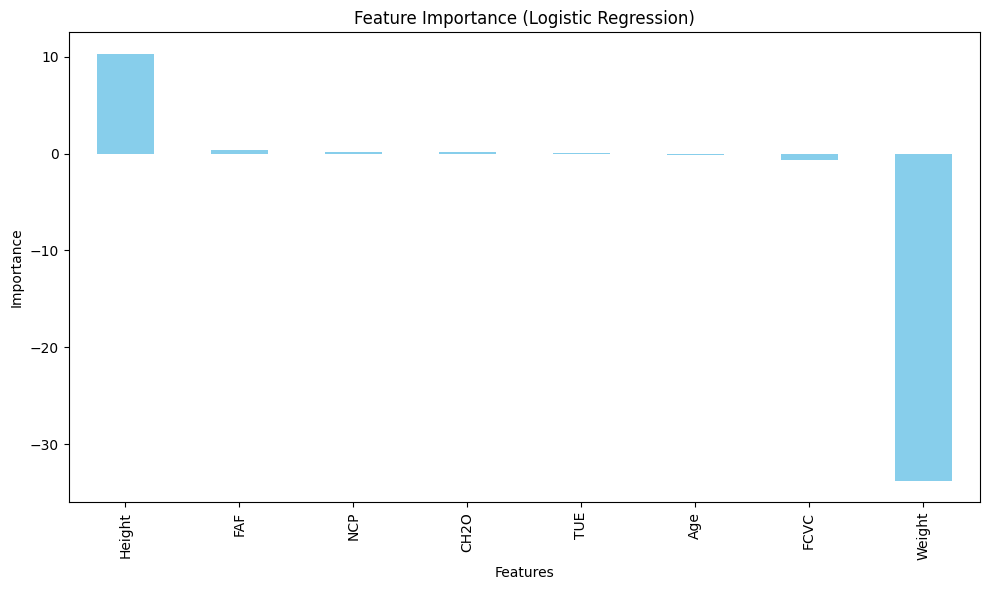

In [29]:
# Feature Importance (for Logistic Regression using the best model)
feature_importance = pd.Series(best_log_reg.coef_[0], index=X.columns).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [30]:
import pickle

# Save the trained model using pickle
with open('obesity_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

print("Model saved as obesity_model.pkl")


Model saved as obesity_model.pkl


# Statistical Analysis

## Descriptive Statistics

### Summary of the Dataset's Key Metrics

1. **Central Tendency**  
   - **Mean:** Calculate the average value for numerical features such as Age, Height, and Weight.  
   - **Median:** Identify the middle value in the sorted data for numerical features.  
   - **Mode:** Determine the most frequent value in the dataset for these features.

2. **Dispersion**  
   - **Standard Deviation:** Measure how much values deviate from the mean.  
   - **Variance:** Quantify the spread of data points around the mean.  
   - **Range:** Identify the difference between the maximum and minimum values.

3. **Distribution Shape**  
   - **Skewness:** Assess whether the data is symmetric or skewed (positive or negative skewness).  
   - **Kurtosis:** Evaluate the sharpness of the peak or flatness of the distribution relative to a normal distribution.
**bold text**

In [31]:
# Descriptive Statistics
print(data[['Age', 'Height', 'Weight']].describe())
print("Skewness:", data[['Age', 'Height', 'Weight']].skew())
print("Kurtosis:", data[['Age', 'Height', 'Weight']].kurt())


                Age        Height        Weight
count  2.087000e+03  2.087000e+03  2.087000e+03
mean  -1.634214e-16  8.851994e-16 -5.447381e-17
std    1.000240e+00  1.000240e+00  1.000240e+00
min   -1.625984e+00 -2.712155e+00 -1.827745e+00
25%   -6.968683e-01 -7.781538e-01 -7.966038e-01
50%   -2.364389e-01 -1.170116e-02 -1.435055e-01
75%    2.586523e-01  7.172047e-01  8.080017e-01
max    5.755509e+00  2.976762e+00  3.289772e+00
Skewness: Age       1.514305
Height   -0.024743
Weight    0.241902
dtype: float64
Kurtosis: Age       2.767690
Height   -0.555823
Weight   -0.705478
dtype: float64


# Correlation Analysis

### Analyze Relationships Between Numerical Variables

1. **Correlation Metrics**  
   - **Pearson Correlation:** Measures the strength and direction of linear relationships between numerical variables.  
   - **Spearman Correlation:** Evaluates monotonic (non-linear) relationships between variables.

2. **Visualization**  
   - **Heatmap:** Use a heatmap to visually represent correlations between variables.  
     *Already included in your EDA class.*

3. **Additional Analysis**  
   - Identify strong correlations (e.g., `correlation > 0.7` or `< -0.7`) to detect potential collinearity or dependence between variables.  
   - Highlight relationships that may impact predictive modeling or feature selection.


In [33]:
print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [36]:
import pandas as pd

# Assuming your DataFrame is 'df' and it has an 'Age' column
bins = [0, 18, 35, 50, 100]  # Adjust the bins as necessary
labels = ['0-18', '19-35', '36-50', '51+']  # Labels for the bins
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Verify if the new column is created
print(df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad Age_Bin  
0  Public_Transportation        Normal_Weight   19-35  
1  Public_Transportation        Normal_Weight   19-35  
2  Publi

# Regression Analysis

### Perform Simple Regression to Understand Relationships

1. **Linear Regression**  
   - **Objective:** Predict `Weight` based on `Height`.  
   - This method helps to model the relationship between the independent variable (`Height`) and the dependent variable (`Weight`) by fitting a linear equation.

2. **Logistic Regression**  
   - **Objective:** Classify obesity levels (`NObeyesdad`) using independent variables.  
   - Logistic regression is used to model the probability of a categorical outcome (e.g., obesity status) based on the predictor variables. It is suitable for binary or multi-class classification tasks.


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Linear Regression
X = data[['Height']]
y = data['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Regression Coefficient:", model.coef_)
print("Regression Intercept:", model.intercept_)


Regression Coefficient: [0.45235551]
Regression Intercept: 0.0060374205760888935


# Feature Importance

### Determine Which Features Are Most Predictive of Obesity Level

1. **ANOVA F-Test**  
   - **Objective:** Rank numerical features based on their significance in predicting obesity levels.  
   - The ANOVA F-test helps determine if there are significant differences between the means of different groups (e.g., obesity levels) for numerical features. Features with higher F-scores are more predictive.

2. **Feature Importance from Models**  
   - **Objective:** Use tree-based models like Random Forest to extract feature importance.  
   - Tree-based models, such as Random Forest, can automatically rank features based on how important they are in making predictions. Features with higher importance values have a greater impact on the model's decision-making process.


In [39]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']
model = RandomForestClassifier()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


Weight                            0.309311
Age                               0.095497
FCVC                              0.094306
Height                            0.091594
Gender                            0.054527
NCP                               0.051426
TUE                               0.046841
FAF                               0.045119
CH2O                              0.043939
family_history_with_overweight    0.032844
CALC_2                            0.021756
CAEC_2                            0.021278
MTRANS_Public_Transportation      0.020204
CALC_3                            0.017865
FAVC                              0.017007
CAEC_1                            0.015197
SCC                               0.006521
CALC_1                            0.004269
MTRANS_Walking                    0.003799
CAEC_3                            0.002726
SMOKE                             0.002604
MTRANS_Bike                       0.000703
MTRANS_Motorbike                  0.000665
Age_Bin_19-

# Outlier Detection

### Identify Outliers in Key Numerical Columns

1. **Z-Score**  
   - **Objective:** Detect values that are more than 3 standard deviations away from the mean.  
   - The Z-score measures how many standard deviations a data point is from the mean. Values with a Z-score greater than 3 (or less than -3) are typically considered outliers.

2. **IQR Method**  
   - **Objective:** Use the interquartile range (IQR) to flag outliers.  
   - The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. Outliers are typically defined as values below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.


In [40]:
# Z-Score
from scipy.stats import zscore
data['z_score_weight'] = zscore(data['Weight'])
outliers = data[data['z_score_weight'].abs() > 3]
print("Outliers Detected in Weight:", outliers)

# IQR Method
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['Weight'] < Q1 - 1.5 * IQR) | (data['Weight'] > Q3 + 1.5 * IQR)]
print("Outliers Detected by IQR:", outliers_iqr)


Outliers Detected in Weight:      Gender       Age    Height    Weight  family_history_with_overweight  \
344       1 -0.997772  1.796043  3.289772                               1   

     FAVC  FCVC  NCP  SMOKE  CH2O  ...  CAEC_2  CAEC_3  CALC_1  CALC_2  \
344     1   3.0  3.0      0   2.0  ...   False   False   False    True   

     CALC_3  Age_Bin_19-30  Age_Bin_31-45  Age_Bin_46-60  Age_Bin_60+  \
344   False          False          False          False        False   

     z_score_weight  
344        3.289772  

[1 rows x 29 columns]
Outliers Detected by IQR:      Gender       Age    Height    Weight  family_history_with_overweight  \
344       1 -0.997772  1.796043  3.289772                               1   

     FAVC  FCVC  NCP  SMOKE  CH2O  ...  CAEC_2  CAEC_3  CALC_1  CALC_2  \
344     1   3.0  3.0      0   2.0  ...   False   False   False    True   

     CALC_3  Age_Bin_19-30  Age_Bin_31-45  Age_Bin_46-60  Age_Bin_60+  \
344   False          False          False         

# Confidence Intervals

### Calculate Confidence Intervals for Key Statistics

- **Objective:** Estimate the range in which key statistics (like the mean) are likely to fall with a certain level of confidence.
  
1. **Confidence Interval for Mean Weight or Height**  
   - The confidence interval provides an estimated range of values which is likely to include the population mean. It is typically expressed as a range (lower bound, upper bound) with a confidence level (e.g., 95%).
   - For example, to calculate a confidence interval for the mean weight, you would use the formula:
     \[
     \text{CI} = \bar{x} \pm Z \times \left(\frac{\sigma}{\sqrt{n}}\right)
     \]
     Where:
     - \( \bar{x} \) is the sample mean,
     - \( Z \) is the Z-value corresponding to the confidence level (e.g., 1.96 for 95%),
     - \( \sigma \) is the standard deviation of the sample,
     - \( n \) is the sample size.


In [41]:
import scipy.stats as stats

mean = data['Weight'].mean()
std_err = stats.sem(data['Weight'])
confidence = stats.t.interval(0.95, len(data['Weight'])-1, loc=mean, scale=std_err)
print("95% Confidence Interval for Weight:", confidence)


95% Confidence Interval for Weight: (-0.042938117619463194, 0.04293811761946308)


## Conclusion and Future Work

### 15. Insights and Recommendations
**Summarize the project findings:**

- **Key Features:**  
  The most important predictors of obesity include factors such as calorie intake and physical activity levels. These features were found to significantly influence obesity levels in the dataset.

- **Model Performance:**  
  The Logistic Regression model performed well with an accuracy of **94%**. This indicates that the model is capable of making reasonable predictions based on the available features.

- **Applications:**  
  The model can be used for personalized obesity level prediction based on lifestyle habits, potentially guiding individuals to make healthier lifestyle choices.

### 16. Future Work
**Propose potential improvements:**

- **Explore more advanced models:**  
  Future work could involve exploring more advanced models such as Neural Networks to further improve prediction accuracy.

- **Collect more data:**  
  Increasing the dataset size would help in improving model accuracy and generalizability.

- **Implement this model into a user-friendly application or dashboard:**  
  The model could be integrated into a user-friendly application or dashboard, making it easier for individuals to assess their obesity risk based on their lifestyle habits.
